<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


このラボでは、データの視覚化に焦点を当てます。データセットはRDBMSを介して提供され、SQLクエリを使用して必要なデータを抽出する必要があります。

## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


 - データの分布を視覚化します。

 - 2つの機能間の関係を視覚化します。

 - ボックスプロットを使用してデータ構成と比較を視覚化します。

### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

In [4]:
import urllib.request

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite'
output_filename = "survey-data.sqlite"

try:
    urllib.request.urlretrieve(url, output_filename)
    print(f"ファイル '{output_filename}' をダウンロードしました。")

except urllib.error.URLError as e:
    print(f"ダウンロード中にエラーが発生しました: {e}")

ファイル 'survey-data.sqlite' をダウンロードしました。


#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
# !pip install pandas

In [ ]:
# !pip install matplotlib

In [12]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2.5})

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


ボックスプロットを使用して、補償全体で分布と外れ値を分析します。

<Figure size 1200x600 with 0 Axes>

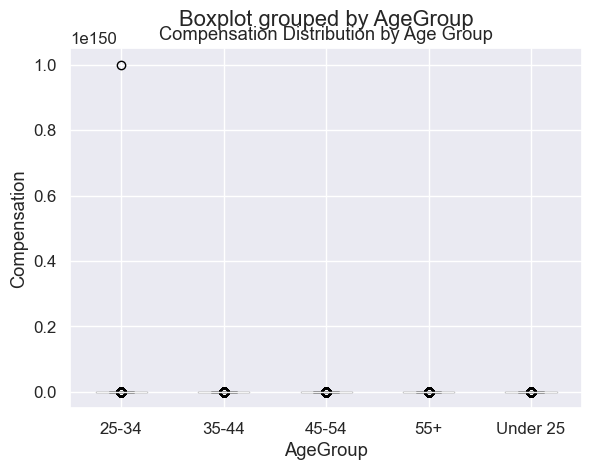

In [13]:
# your code goes here

QUERY = """
SELECT 
    CASE 
        WHEN CAST(Age AS INTEGER) < 25 THEN 'Under 25'
        WHEN CAST(Age AS INTEGER) BETWEEN 25 AND 34 THEN '25-34'
        WHEN CAST(Age AS INTEGER) BETWEEN 35 AND 44 THEN '35-44'
        WHEN CAST(Age AS INTEGER) BETWEEN 45 AND 54 THEN '45-54'
        ELSE '55+'
    END as AgeGroup,
    CompTotal
FROM main 
WHERE Age IS NOT NULL AND Age != 'NA' AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
df_age_comp.boxplot(column='CompTotal', by='AgeGroup')
plt.title('Compensation Distribution by Age Group')
plt.ylabel('Compensation')
plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


「Age」列を数値に変換し、分布を視覚化します。

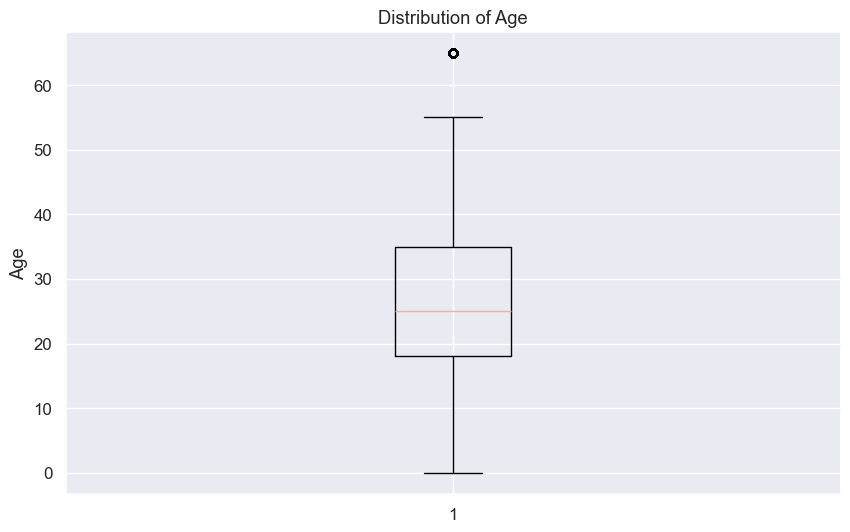

In [21]:
# your code goes here

QUERY = "SELECT CAST(Age AS INTEGER) as Age FROM main WHERE Age IS NOT NULL AND Age != 'NA'"
df_age = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age'])
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


さまざまな年齢層にわたる補償の分布を視覚化します。

<Figure size 1200x600 with 0 Axes>

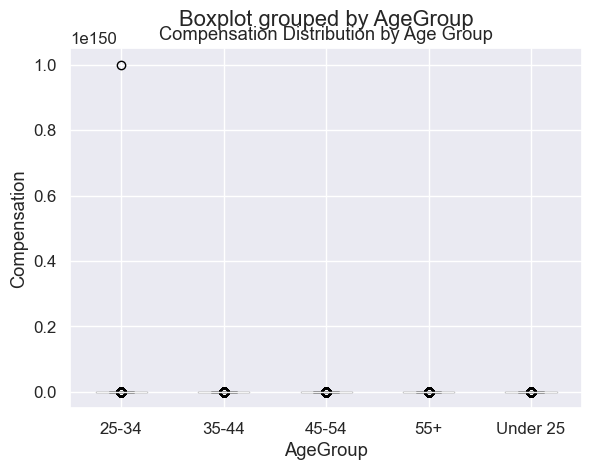

In [22]:
# your code goes here

QUERY = """
SELECT 
    CASE 
        WHEN CAST(Age AS INTEGER) < 25 THEN 'Under 25'
        WHEN CAST(Age AS INTEGER) BETWEEN 25 AND 34 THEN '25-34'
        WHEN CAST(Age AS INTEGER) BETWEEN 35 AND 44 THEN '35-44'
        WHEN CAST(Age AS INTEGER) BETWEEN 45 AND 54 THEN '45-54'
        ELSE '55+'
    END as AgeGroup,
    CompTotal
FROM main 
WHERE Age IS NOT NULL AND Age != 'NA' AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
df_age_comp.boxplot(column='CompTotal', by='AgeGroup')
plt.title('Compensation Distribution by Age Group')
plt.ylabel('Compensation')
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


仕事の満足度レベルに基づいて補償がどのように変化するかを調べます。

<Figure size 1200x600 with 0 Axes>

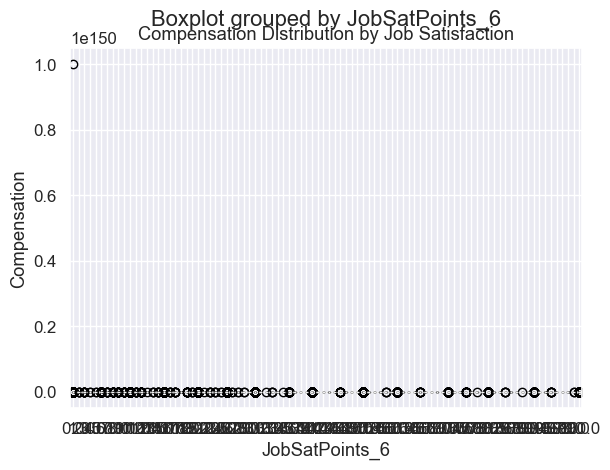

In [20]:
# your code goes here

QUERY = """
SELECT JobSatPoints_6, CompTotal 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df_sat_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
df_sat_comp.boxplot(column='CompTotal', by='JobSatPoints_6')
plt.title('Compensation Distribution by Job Satisfaction')
plt.ylabel('Compensation')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


上位5つの開発者の役割全体で報酬を分析します。


<Figure size 1500x600 with 0 Axes>

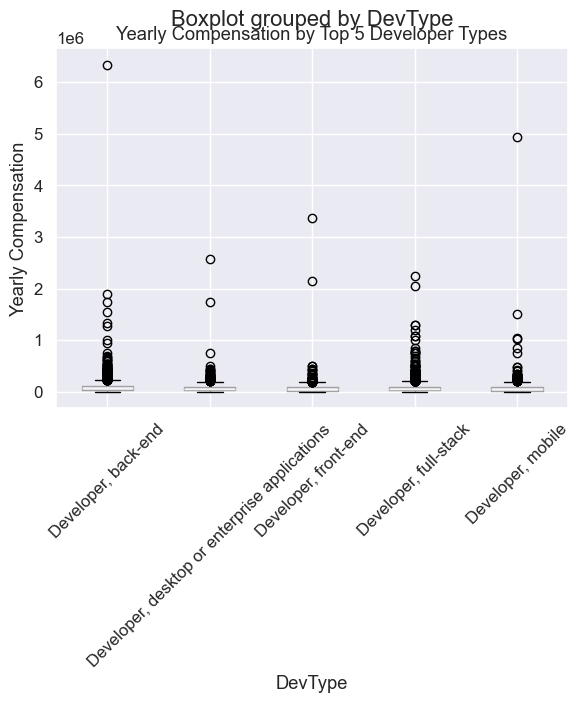

In [23]:
# your code goes here

QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df_dev = pd.read_sql_query(QUERY, conn)

# Get top 5 developer types
top_dev_types = df_dev['DevType'].value_counts().head(5).index
df_top_dev = df_dev[df_dev['DevType'].isin(top_dev_types)]

plt.figure(figsize=(15, 6))
df_top_dev.boxplot(column='ConvertedCompYearly', by='DevType')
plt.title('Yearly Compensation by Top 5 Developer Types')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45)
plt.show()



**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


上位5か国の回答者間の報酬を分析します。

<Figure size 1500x600 with 0 Axes>

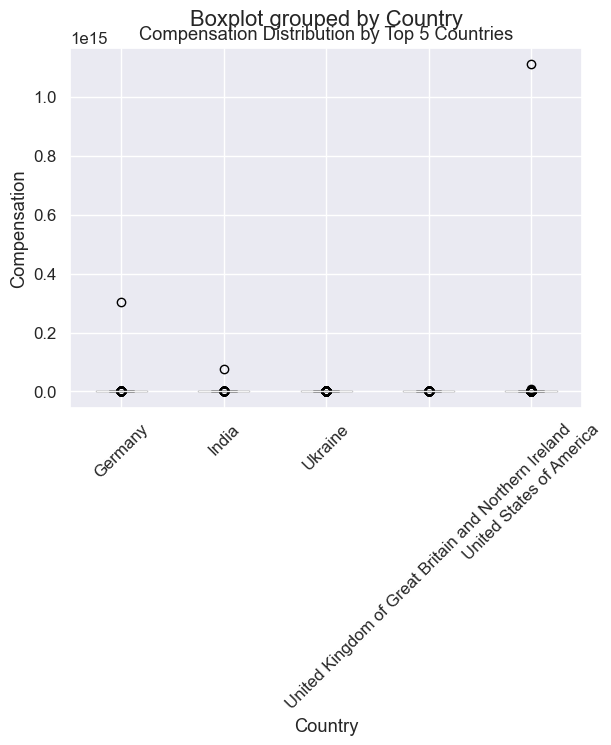

In [24]:
# your code goes here

QUERY = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df_country = pd.read_sql_query(QUERY, conn)

# Get top 5 countries
top_countries = df_country['Country'].value_counts().head(5).index
df_top_countries = df_country[df_country['Country'].isin(top_countries)]

plt.figure(figsize=(15, 6))
df_top_countries.boxplot(column='CompTotal', by='Country')
plt.title('Compensation Distribution by Top 5 Countries')
plt.ylabel('Compensation')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


さまざまな雇用タイプの補償を分析します。

<Figure size 1200x600 with 0 Axes>

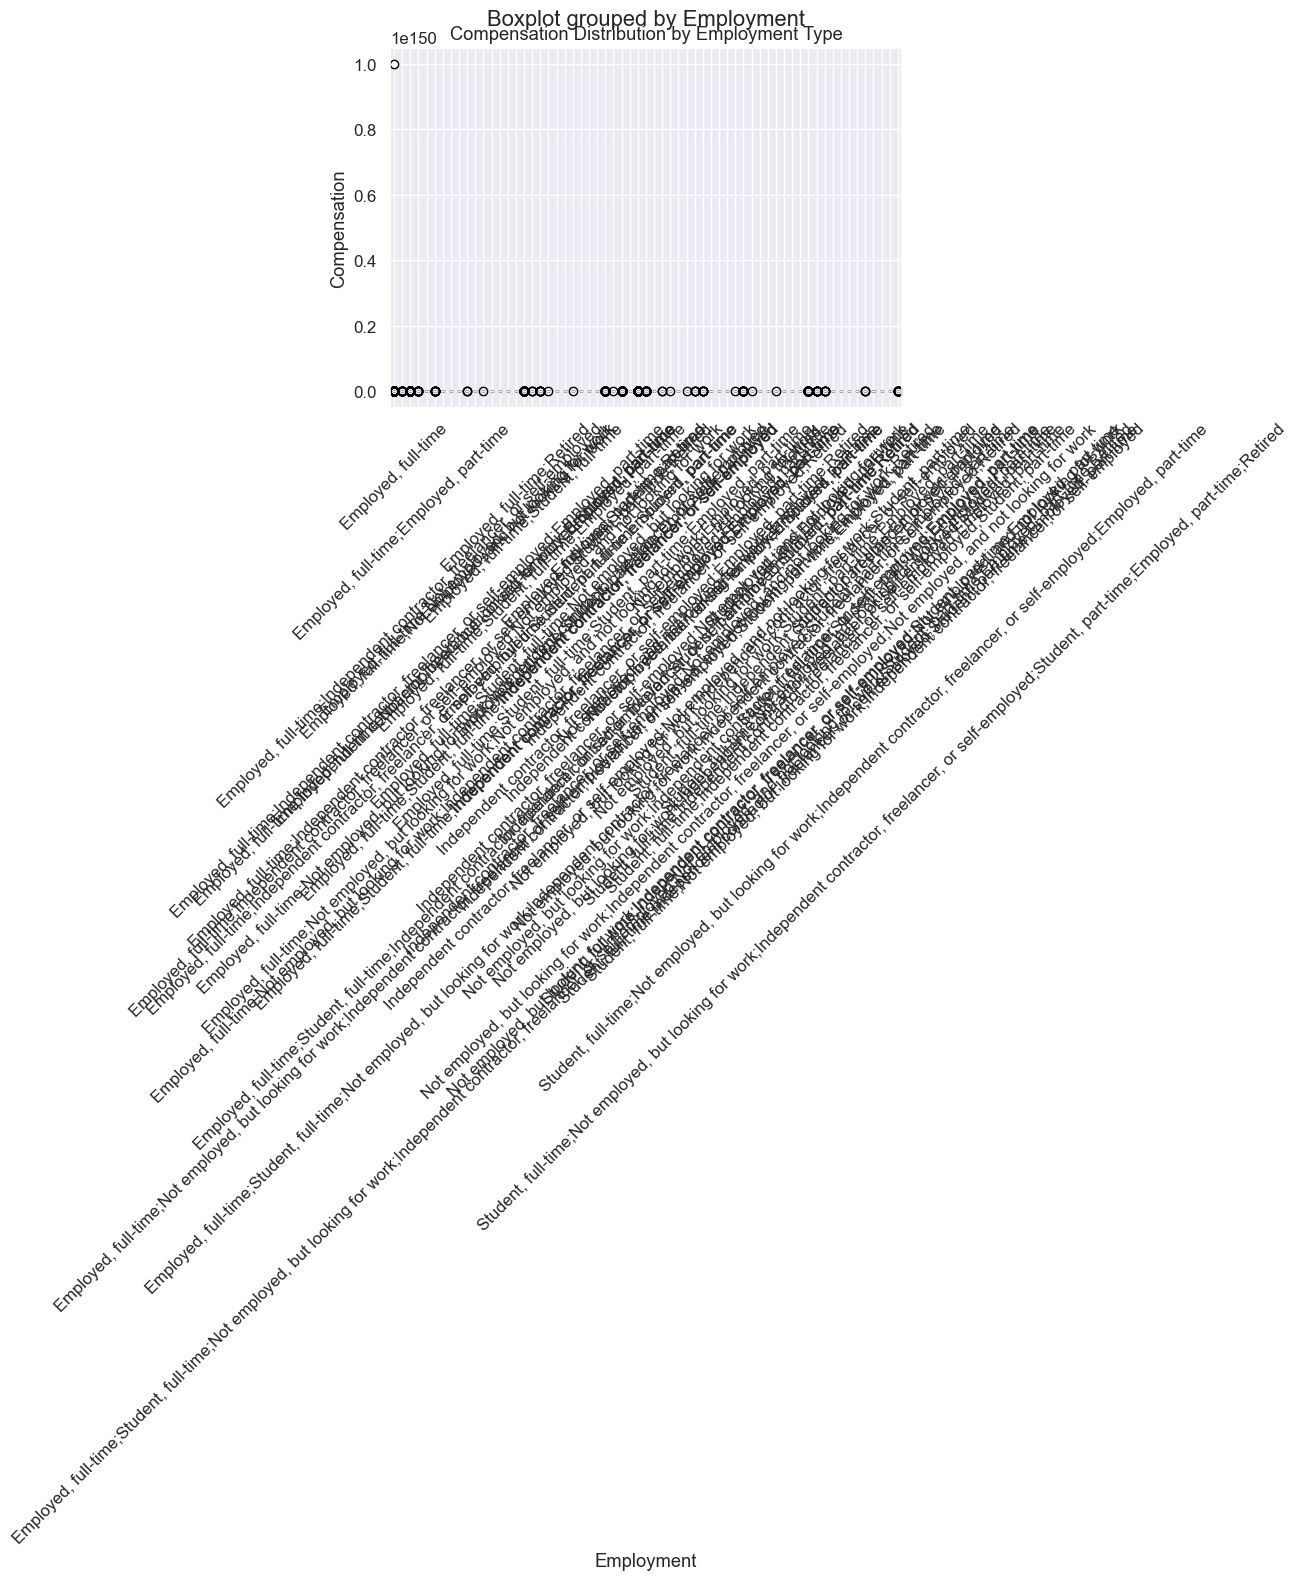

In [25]:
# your code goes here

QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df_emp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
df_emp.boxplot(column='CompTotal', by='Employment')
plt.title('Compensation Distribution by Employment Type')
plt.ylabel('Compensation')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


仕事の満足度レベルごとに、専門的なコーディング年の分布を調べます。

<Figure size 1200x600 with 0 Axes>

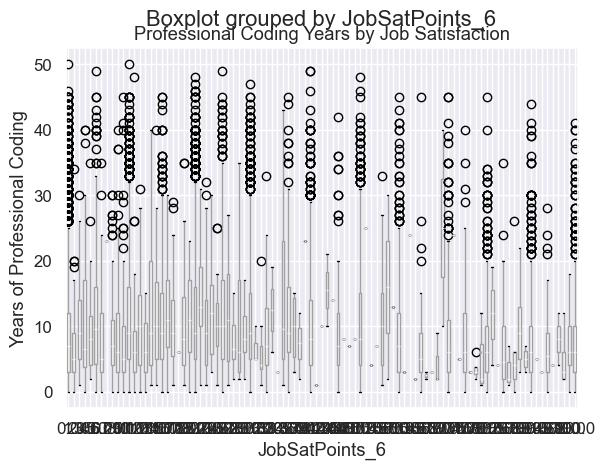

In [26]:
# your code goes here

QUERY = """
SELECT JobSatPoints_6, CAST(YearsCodePro AS INTEGER) as YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL AND YearsCodePro != 'NA'
"""
df_years = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
df_years.boxplot(column='YearsCodePro', by='JobSatPoints_6')
plt.title('Professional Coding Years by Job Satisfaction')
plt.ylabel('Years of Professional Coding')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [27]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
